In [280]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mat']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [281]:
indir = '/mnt/store1/oliverphilcox/PowerCovTest/PowerCovMatrices/'
n=19
l=0
c2 = np.loadtxt(indir+'c2_leg_n%d_l%d_11_full.txt'%(n,l))
c3 = np.loadtxt(indir+'c3_leg_n%d_l%d_1,11_full.txt'%(n,l))
c4 = np.loadtxt(indir+'c4_leg_n%d_l%d_11,11_full.txt'%(n,l))
## Apply symmetries
c2 = 0.5*(c2+c2.T)
c3 = 0.5*(c3+c3.T)
c4 = 0.5*(c4+c4.T)
c_tot = c2+c3+c4

In [282]:
def rebinner(mat):
    new_mat = np.zeros_like(mat)
    m=len(mat)//n
    for i in range(m):
        for j in range(m):
            new_mat[n*i:n*(i+1),n*j:n*(j+1)]=mat[i::m,j::m]
    return new_mat

In [283]:
mat = rebinner(c2)
imat = np.linalg.inv(mat)

In [284]:
def red_mat(mat):
    m=len(mat)//n
    new_mat = np.zeros_like(mat)
    for i in range(len(mat)):
        for j in range(len(mat)):
            new_mat[i,j]=mat[i,j]/np.sqrt(mat[i,i]*mat[j,j])
    return new_mat

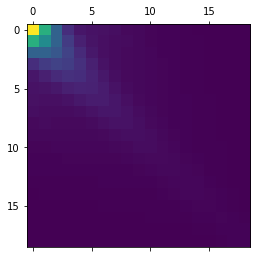

In [285]:
plt.matshow(mat_old)

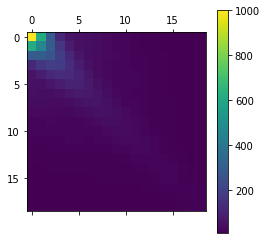

In [286]:
plt.matshow(mat);plt.colorbar();

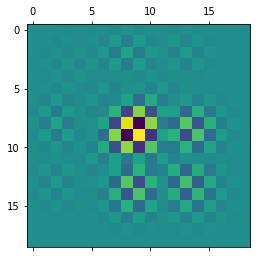

In [287]:
plt.matshow(np.linalg.inv(mat))

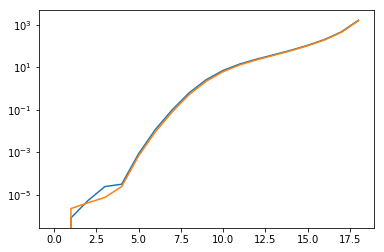

In [288]:
#plt.plot(1./np.linalg.eigvalsh(imat)[::-1])
plt.plot(np.linalg.eigvalsh(mat))
plt.plot(np.linalg.eigvalsh(mat_old))
plt.yscale('log')

In [45]:
mat

array([[918.0456  , 581.0744  , 290.1894  , 122.4203  ,  61.49255 ,
         50.04406 ,  45.98572 ,  37.82318 ,  29.15288 ,  22.98698 ,
         18.69089 ,  15.08635 ,  12.0218  ,   9.725481,   8.145563,
          7.011053,   6.090129,   5.284215,   4.584516],
       [581.0744  , 443.5299  , 290.421   , 163.819   ,  86.20139 ,
         52.42254 ,  41.70048 ,  36.31433 ,  29.94901 ,  23.55543 ,
         18.6417  ,  15.08838 ,  12.28769 ,  10.03336 ,   8.325239,
          7.066864,   6.097827,   5.300769,   4.616572],
       [290.1894  , 290.421   , 253.5015  , 185.1125  , 113.9815  ,
         64.97498 ,  42.06108 ,  33.97992 ,  29.33604 ,  24.09372 ,
         19.06139 ,  15.26207 ,  12.527   ,  10.36246 ,   8.587166,
          7.200473,   6.151361,   5.331246,   4.647513],
       [122.4203  , 163.819   , 185.1125  , 171.1327  , 129.9485  ,
         83.71538 ,  50.55578 ,  34.17231 ,  27.72695 ,  23.80401 ,
         19.65757 ,  15.77856 ,  12.82216 ,  10.63838 ,   8.877033,
          7.4

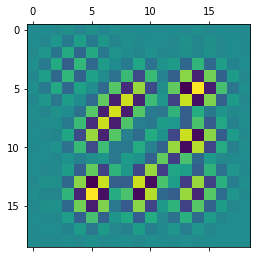

In [46]:
plt.matshow(np.linalg.inv(mat))

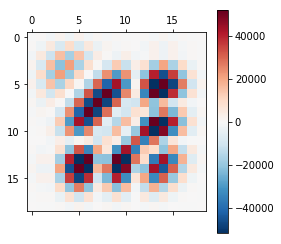

In [47]:
mat = np.linalg.inv(rebinner(c2))
vmax = np.percentile(mat,99.)
plt.matshow(mat,vmax=vmax,vmin=-vmax,cmap=cm.RdBu_r)
plt.colorbar();

In [73]:
np.save('theory_power_cov.npy',mat)

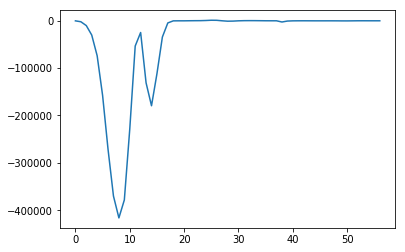

In [72]:
plt.plot(np.diag(np.linalg.inv(mat)))

In [226]:
from scipy.integrate import quad
def quad_int(nn):
    fun = lambda x: -x/nn*(np.exp(-((x+nn)/20)**2.)-np.exp(-((x-nn)/20)**2.))/(0.1+x)**4.
    out=quad(fun,0,np.inf)
    return out[0]

In [224]:
qq1=np.asarray([quad_int(n) for n in nn])

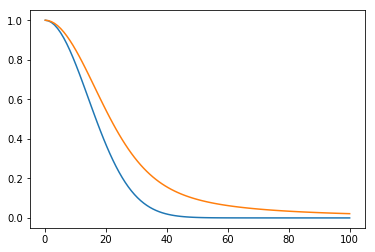

In [227]:
nn = np.linspace(0.1,100,100)
qq=np.asarray([quad_int(n) for n in nn])
plt.plot(nn,qq/qq[0])
plt.plot(nn,qq1/qq1[0])